In [ ]:
# carrega o deepxde
!pip install deepxde -q gwpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.8/179.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import deepxde as dde
import numpy as np
import tensorflow as tf


No backend selected.
Finding available backend...


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


Enable just-in-time compilation with XLA.



In [ ]:
# arranjo 2 m/s
#ob_t0 = [10.88, 13.85, 15.98, 17.94, 19.99, 21.86, 23.99,  25.95,  28.00, 29.88, 31.93, 33.72, 35.69, 37.83, 39.96, 41.84, 43.98, 45.69, 47.83, 49.88, 51.94, 53.91, 57.95, 60.10]
#ob_y0 = [0.28, 5.68, 18.66, 45.44, 68.15, 95.74, 116.84, 132.25, 153.35, 161.46, 174.44, 181.74, 196.35, 196.35, 208.52, 215.01, 211.76, 217.44, 225.56, 230.43, 227.99, 207.71, 193.91, 172.01]

# arranjo 3 m/s
#ob_t0 = [10.88, 13.92, 16.04, 17.91, 19.94, 21.81, 23.94, 25.90, 27.86, 29.90, 31.96, 34.10, 35.89, 37.69, 39.92, 41.91, 43.89, 45.87, 47.93, 49.99, 52.05, 54.03, 56.00, 58.05, 59.85]
#ob_y0 = [0.28, 41.38, 80.32, 126.57, 176.06, 214.20,  245.84, 266.13, 286.41, 303.45, 308.32, 308.32, 314.00, 314.81, 295.33, 265.31, 234.48, 204.46,  188.24, 171.20, 159.84, 153.35, 149.29, 150.91, 144.42]

# arranjo 4 m/s
#ob_t0 = [11.97, 13.82, 15.85, 18.14, 20.00, 21.87, 24.09, 25.88, 27.84, 29.80, 31.94, 33.76, 35.92, 37.73, 39.88, 41.86, 43.92, 45.89, 48.04, 49.92, 52.06, 53.95, 56.09, 58.06, 60.12]
#ob_y0 = [0.81, 68.15, 128.19, 180.93, 233.67, 266.94, 291.28, 312.37, 332.66, 346.45, 340.77, 305.88, 258.01, 218.26, 191.48, 172.82, 163.08, 156.59, 149.29, 144.42, 137.93, 137.12, 130.63, 130.63, 125.76]

# arranjo 5 m/s
ob_t0 = [11.97, 13.98, 16.09, 17.95, 19.90, 21.85, 23.89, 25.85, 27.65, 29.98, 31.97, 33.96, 35.94, 38.01, 40.07, 41.87, 43.93, 45.98, 48.13, 50.18, 51.98, 54.12, 56.18, 58.06, 60.03]
ob_y0 = [0.00, 93.31, 166.33, 230.43, 280.73, 328.60, 355.38, 374.04, 369.17, 329.41, 272.62, 225.56, 193.10, 175.25, 164.71, 159.03, 148.48, 141.99, 137.93, 132.25, 128.19, 124.95, 122.52, 123.33, 120.08 ]

# -------------------------
ob_t = (np.array(ob_t0)-(max(ob_t0)-60))/(max(ob_t0)-(max(ob_t0)-60))
ob_y = (np.array(ob_y0)-min(ob_y0))/(max(ob_y0)-min(ob_y0))

# -------------------------
ob_t = ob_t.reshape((len(ob_t0), 1))
ob_y = ob_y.reshape((len(ob_t0), 1))


In [ ]:
A1 = dde.Variable(1.0)
B1 = dde.Variable(1.0)
C1 = dde.Variable(1.0)
D1 = dde.Variable(1.0)
E1 = dde.Variable(0.0)
F1 = dde.Variable(0.5)

def ode_nl1(x, y):
    y1, y2 = y[:, 0:1], y[:, 1:2]
    dy1_x = dde.grad.jacobian(y, x, i=0)
    dy2_x = dde.grad.jacobian(y, x, i=1)
    return [
        dy1_x + A1*y1 - B1*y2 - C1*(1/(1+tf.exp(-30*(x-E1)))-1/(1+tf.exp(-30*(x-F1)))) + D1*y1*y2,
        dy2_x - A1*y1 + B1*y2 - D1*y1*y2,
    ]

A2 = dde.Variable(1.0)
B2 = dde.Variable(1.0)
C2 = dde.Variable(1.0)
D2 = dde.Variable(1.0)
E2 = dde.Variable(0.0)
F2 = dde.Variable(0.5)
G2 = dde.Variable(1.0)

def ode_nl2(x, y):
    y1, y2 = y[:, 0:1], y[:, 1:2]
    dy1_x = dde.grad.jacobian(y, x, i=0)
    dy2_x = dde.grad.jacobian(y, x, i=1)
    return [
        dy1_x + A2*y1 - B2*y2 - C2*(1/(1+tf.exp(-30*(x-E2)))-1/(1+tf.exp(-30*(x-F2)))) + D2*y1/(G2+y1),
        dy2_x - A2*y1 + B2*y2,
    ]

A3 = dde.Variable(1.0)
B3 = dde.Variable(1.0)
C3 = dde.Variable(1.0)
D3 = dde.Variable(1.0)
E3 = dde.Variable(0.0)
F3 = dde.Variable(0.5)

def ode_lin(x, y):
    y1, y2 = y[:, 0:1], y[:, 1:2]
    dy1_x = dde.grad.jacobian(y, x, i=0)
    dy2_x = dde.grad.jacobian(y, x, i=1)
    return [
        dy1_x + A3*y1 - B3*y2 - C3*(1/(1+tf.exp(-30*(x-E3)))-1/(1+tf.exp(-30*(x-F3)))) + D3*y1,
        dy2_x - A3*y1 + B3*y2,
    ]

In [ ]:
def boundary(_, on_initial):
    return on_initial

geom = dde.geometry.TimeDomain(ob_t[0][0], 1)

# CONDIÇÕES INICIAIS
ic1 = dde.icbc.IC(geom, lambda x: 0, boundary, component=0)
ic2 = dde.icbc.IC(geom, lambda x: 0, boundary, component=1)

# INSERE O CONJUNTO DE DADOS CONHECIDOS NA FUNÇÃO DE PERDA
observe_y0 = dde.icbc.PointSetBC(ob_t, ob_y, component=0)

Compiling model...
Building feed-forward neural network...
'build' took 0.178995 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 1.726485 s

Training model...

Step      Train loss                                            Test loss                                             Test metric
0         [8.52e-01, 2.49e-01, 1.92e-03, 2.04e-03, 4.81e-01]    [8.52e-01, 2.49e-01, 1.92e-03, 2.04e-03, 4.81e-01]    []  
1000      [7.46e-03, 1.93e-03, 1.76e-02, 9.14e-04, 8.40e-02]    [7.46e-03, 1.93e-03, 1.76e-02, 9.14e-04, 8.40e-02]    []  
2000      [1.67e-03, 1.89e-05, 1.03e-02, 7.76e-05, 6.77e-02]    [1.67e-03, 1.89e-05, 1.03e-02, 7.76e-05, 6.77e-02]    []  
3000      [1.18e-03, 4.19e-06, 6.62e-03, 2.15e-05, 5.29e-02]    [1.18e-03, 4.19e-06, 6.62e-03, 2.15e-05, 5.29e-02]    []  
4000      [8.42e-04, 1.65e-05, 4.62e-03, 2.71e-05, 3.72e-02]    [8.42e-04, 1.65e-05, 4.62e-03, 2.71e-05, 3.72e-02]    []  
5000      [6.07e-04, 2.30e-05, 3.00e-03, 1.61e-05, 2.59e-02]    [6.07e-04, 2.30e-05, 3.00e-03, 1.61e-05, 2.59e-02]    []  
6000      [4.30e-04, 2.04e-05, 1.85e-03, 8.42e-06, 1.88e-02]    [4.30e-04, 2.04e-05, 1

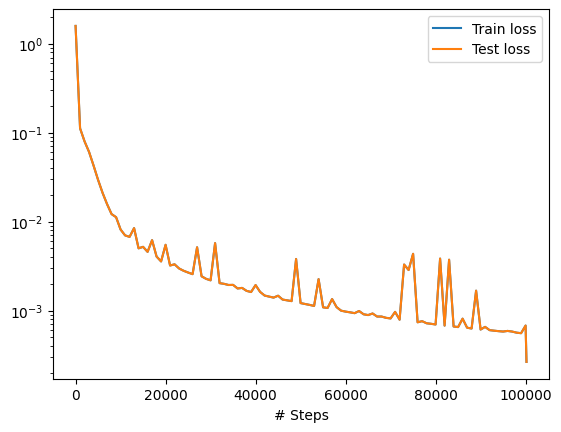

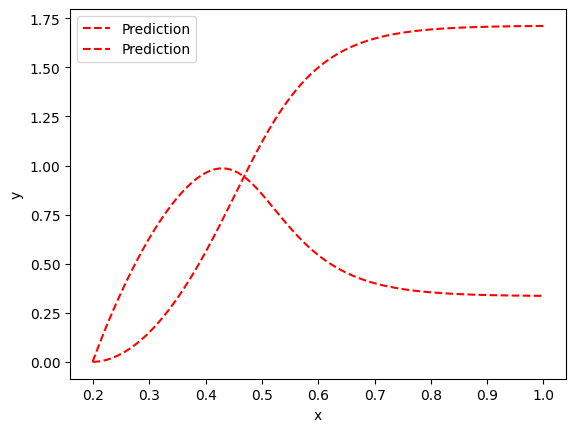

In [ ]:
dde.config.set_random_seed(1)

# eq 1
data1 = dde.data.PDE(
    geom,
    ode_nl1,
    [ic1, ic2, observe_y0],
    num_domain=1000,
    num_boundary=2,
    anchors=ob_t,
)

net1 = dde.nn.FNN([1] + [100] * 4 + [2], "tanh", "Glorot uniform")
model1 = dde.Model(data1, net1)

external_trainable_variables1 = [A1, B1, C1, D1, E1, F1]
variable1 = dde.callbacks.VariableValue(
    external_trainable_variables1, period=500, filename="variables_nl1.dat"
)

# train adam
model1.compile(
    "adam", lr=0.001, external_trainable_variables=external_trainable_variables1, loss_weights = [1,1,1,1,1]
)
losshistory1, train_state1 = model1.train(iterations=100000, callbacks=[variable1])

# train lbfgs
model1.compile("L-BFGS", external_trainable_variables=external_trainable_variables1, loss_weights = [1,1,1,1,1])
losshistory1, train_state1 = model1.train(callbacks=[variable1])

dde.saveplot(losshistory1, train_state1, issave=True, isplot=True)


Compiling model...
Building feed-forward neural network...
'build' took 0.063924 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 1.017994 s

Training model...

Step      Train loss                                            Test loss                                             Test metric
0         [2.45e-01, 1.87e-03, 2.10e-03, 3.08e-04, 2.30e-01]    [2.45e-01, 1.87e-03, 2.10e-03, 3.08e-04, 2.30e-01]    []  
1000      [2.42e-03, 5.02e-04, 1.49e-02, 4.38e-04, 8.02e-02]    [2.42e-03, 5.02e-04, 1.49e-02, 4.38e-04, 8.02e-02]    []  
2000      [1.41e-03, 5.77e-05, 8.64e-03, 6.46e-05, 6.25e-02]    [1.41e-03, 5.77e-05, 8.64e-03, 6.46e-05, 6.25e-02]    []  
3000      [1.02e-03, 4.28e-05, 5.41e-03, 5.42e-06, 4.89e-02]    [1.02e-03, 4.28e-05, 5.41e-03, 5.42e-06, 4.89e-02]    []  
4000      [7.47e-04, 2.69e-05, 3.56e-03, 7.22e-07, 3.60e-02]    [7.47e-04, 2.69e-05, 3.56e-03, 7.22e-07, 3.60e-02]    []  
5000      [5.32e-04, 8.25e-06, 2.27e-03, 8.13e-10, 2.55e-02]    [5.32e-04, 8.25e-06, 2.27e-03, 8.13e-10, 2.55e-02]    []  
6000      [3.68e-04, 4.51e-06, 1.39e-03, 1.59e-08, 1.82e-02]    [3.68e-04, 4.51e-06, 1

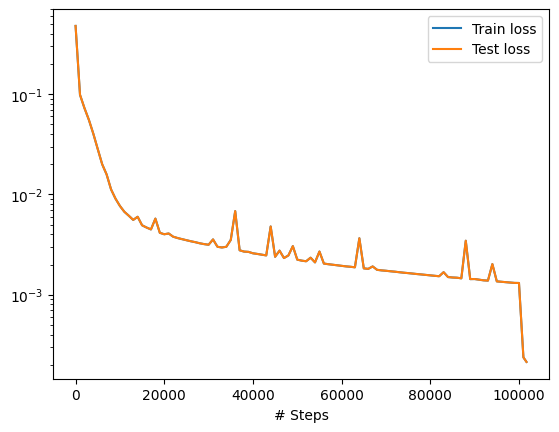

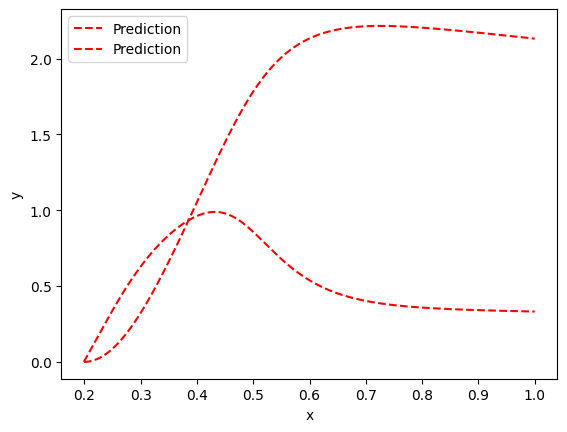

In [ ]:
# -------------------------------
# eq 2
dde.config.set_random_seed(2)
data2 = dde.data.PDE(
    geom,
    ode_nl2,
    [ic1, ic2, observe_y0],
    num_domain=1000,
    num_boundary=2,
    anchors=ob_t,
)

net2 = dde.nn.FNN([1] + [100] * 4 + [2], "tanh", "Glorot uniform")
model2 = dde.Model(data2, net2)

external_trainable_variables2 = [A2, B2, C2, D2, E2, F2, G2]
variable2 = dde.callbacks.VariableValue(
    external_trainable_variables2, period=500, filename="variables_nl2.dat"
)

# train adam
model2.compile(
    "adam", lr=0.001, external_trainable_variables=external_trainable_variables2, loss_weights = [1,1,1,1,1]
)
losshistory2, train_state2 = model2.train(iterations=100000, callbacks=[variable2])

# train lbfgs
model2.compile("L-BFGS", external_trainable_variables=external_trainable_variables2, loss_weights = [1,1,1,1,1])
losshistory2, train_state2 = model2.train(callbacks=[variable2])

dde.saveplot(losshistory2, train_state2, issave=True, isplot=True)

Compiling model...
Building feed-forward neural network...
'build' took 0.065453 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.707905 s

Training model...

Step      Train loss                                            Test loss                                             Test metric
0         [2.37e-01, 1.12e-02, 1.91e-03, 9.04e-04, 2.34e-01]    [2.37e-01, 1.12e-02, 1.91e-03, 9.04e-04, 2.34e-01]    []  
1000      [3.88e-03, 8.08e-05, 1.67e-02, 8.47e-04, 8.93e-02]    [3.88e-03, 8.08e-05, 1.67e-02, 8.47e-04, 8.93e-02]    []  
2000      [2.07e-03, 5.31e-05, 1.06e-02, 2.25e-04, 6.67e-02]    [2.07e-03, 5.31e-05, 1.06e-02, 2.25e-04, 6.67e-02]    []  
3000      [1.44e-03, 2.23e-05, 6.64e-03, 3.81e-05, 5.35e-02]    [1.44e-03, 2.23e-05, 6.64e-03, 3.81e-05, 5.35e-02]    []  
4000      [1.11e-03, 1.57e-05, 4.36e-03, 6.89e-06, 4.10e-02]    [1.11e-03, 1.57e-05, 4.36e-03, 6.89e-06, 4.10e-02]    []  
5000      [6.28e-04, 3.12e-03, 3.30e-03, 1.03e-04, 2.98e-02]    [6.28e-04, 3.12e-03, 3.30e-03, 1.03e-04, 2.98e-02]    []  
6000      [3.81e-04, 2.42e-06, 1.78e-03, 1.08e-08, 2.17e-02]    [3.81e-04, 2.42e-06, 1

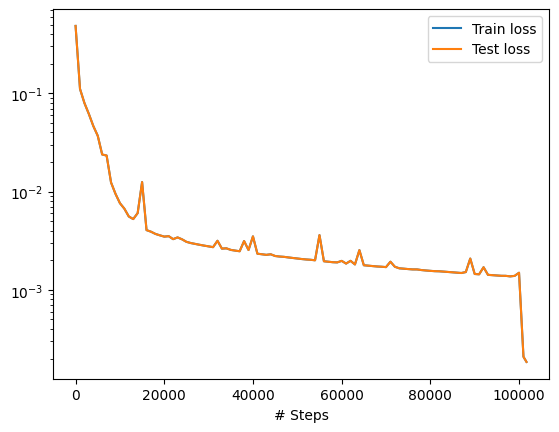

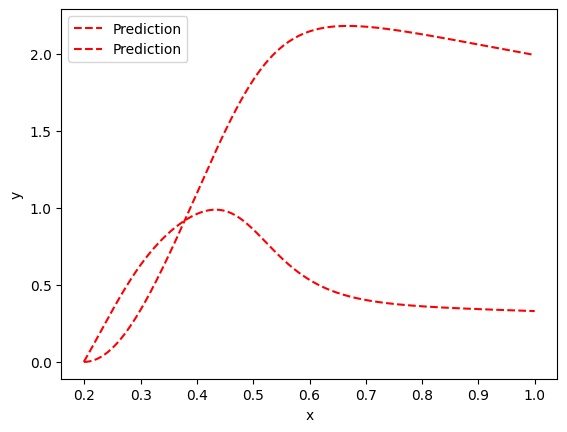

In [ ]:
# -------------------------------
# eq 3
data3 = dde.data.PDE(
    geom,
    ode_lin,
    [ic1, ic2, observe_y0],
    num_domain=1000,
    num_boundary=2,
    anchors=ob_t,
)

net3 = dde.nn.FNN([1] + [100] * 4 + [2], "tanh", "Glorot uniform")
model3 = dde.Model(data3, net3)

external_trainable_variables3 = [A3, B3, C3, D3, E3, F3]
variable3 = dde.callbacks.VariableValue(
    external_trainable_variables3, period=500, filename="variables_lin.dat"
)

# train adam
model3.compile(
    "adam", lr=0.001, external_trainable_variables=external_trainable_variables3, loss_weights = [1,1,1,1,1]
)
losshistory3, train_state3 = model3.train(iterations=100000, callbacks=[variable3])

# train lbfgs
model3.compile("L-BFGS", external_trainable_variables=external_trainable_variables3, loss_weights = [1,1,1,1,1])
losshistory3, train_state3 = model3.train(callbacks=[variable3])

dde.saveplot(losshistory3, train_state3, issave=True, isplot=True)

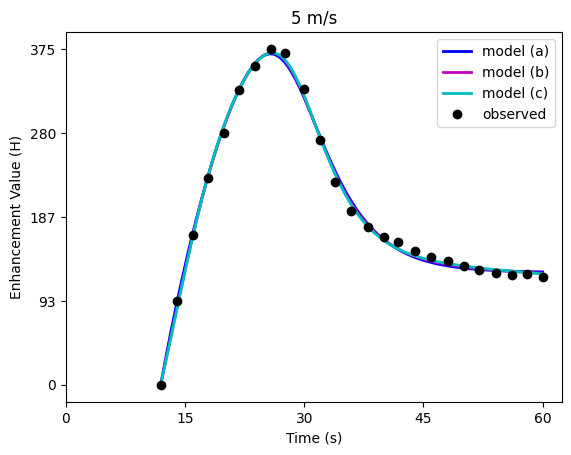

In [ ]:
import matplotlib.pyplot as plt
import math

t = np.linspace(ob_t[0][0], 1, 75)

t = t.reshape(75, 1)

yhat1 = model1.predict(t)
yhat2 = model2.predict(t)
yhat3 = model3.predict(t)

plt.title("5 m/s")
plt.plot(t, yhat1[:,0:1], "b-", label="model (a)",linewidth=2.0)
plt.plot(t, yhat2[:,0:1], "m-", label="model (b)",linewidth=2.0)
plt.plot(t, yhat3[:,0:1], "c-", label="model (c)",linewidth=2.0)
plt.plot(ob_t, ob_y, "ko", label="observed")
plt.legend(loc="upper right")
plt.xlabel("Time (s)")
plt.ylabel("Enhancement Value (H)")
plt.xticks([0.00,0.25,0.50,0.75,1.00], [0, 15, 30, 45, 60])
plt.yticks([0.00,0.25,0.50,0.75,1.00], [0, math.floor(max(ob_y0)/4), math.floor(max(ob_y0)/2), math.floor(3*max(ob_y0)/4), math.ceil(max(ob_y0))])
plt.show()
